# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### Solutions
***

Before answering the questions, I'll quickly look at the shape and structure of the dataset, as well as import the neccessary packages and functions that will be used in the exercise.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, ttest_1samp, ttest_ind, norm, t
from statsmodels.stats.weightstats import ztest

In [14]:
print(df.describe(), '\n')
print(df.info())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


I observe that the dataframe has 130 observations on 2 numeric features (temperature and heart_rate) and 1 categorical (gender). Additionally, there are no null values to worry about.

**1. Is the distribution of body temperatures normal?**

The easiest (though not statistically significant) way to address this is with a histogram. Below I plot a histogram in blue of the temperate data, and histogram of random normal data with the same mean and standard deviation as the sample.

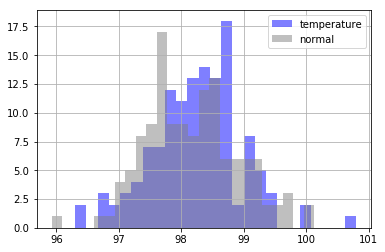

In [18]:
df.temperature.hist(bins = 25, color = 'blue', alpha = .5)
plt.hist(np.random.normal(98.249, .733, 130), bins = 25, color = 'grey', alpha = .5)
plt.legend(['temperature', 'normal'])
plt.show()

It's hard to tell if this is a normal distribution or not. The limited size of the data makes it difficult to know how much of this shape reflects the distribution and how much is attributable to the size of the sample.

To get a better understanding, I'll use the normaltest function from the scipy package. This test will return a p-value for the null hypothesis that the temperature data is normally distributed. I will test this at the 5% significance level  ($\alpha = 0.05$).

In [20]:
normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value of .258 ($ > \alpha$) means that I can not reject the null hypothesis. This does not definitively prove that body temperature is normally distributed, but I cannot say it isn't.

**2. Is the sample size large? Are the observations independent?**

Large sample size is a rather arbitrary distinction, but if I assume this is being asked as a question of if the sample size is large enough for random drawings from it to satisfy the central limit theorem, then yes it is a large sample size, as averages from drawings of size $n >= 30$ are generally considered sufficient to satisfy CLT.

As for independence, again I assume this question is regarding whether the body temperature data satisfies the conditions of CLT, and is thus asking whether the sample is independent of the population, not whether temperature is independent of gender or heart rate. Not knowing how the data was collected, I tried to find information about the study in the [specific article](http://ww2.amstat.org/publications/jse/v4n2/datasets.shoemaker.html) associated with the data from the link provided in the resources section of this notebook. No information was given about how subjects were selected for the study, so I don't know if they tested on subjects experiencing a fever or fatigure or anything that would invalidate independence. I have to assume that an academic study on body temperature did not make such an obvious mistake and say the observations are independent.

**3. Is the true population mean really 98.6 degrees F?**

- *"Would you use a one-sample or two-sample test? Why?"*
    
I would use a 1 sample test, because I am comparing the mean of the sample and its $\sigma$ against the population $\mu$.

- *"In this situation, is it appropriate to use the t or z statistic?"*

Because the sample is well over 30, you could use either statistic. If you were doing the calculations by hand with a z-table to look up p-values of z-scores, I would say to use the z-statistic. In any other case (like now) where it is not computationally intensive, I would use the t-statistic, as I have done below using the 1-sample t-test from the scipy.stats package.

In [22]:
ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We see that outside of the most restrictive $\alpha$, the population mean is not 98.6, as the sample mean is 5.4 units of standard error less than the proposed $\mu = 98.6$ and that the probability of the null hypothesis being true is 0.00000024

- *"Now try using the other test. How is the result be different? Why?"*

*NOTE: This question is awkardly phrased. At first I thought 'the other test' referred to a 2-sample test, but based on question 4, I have assumed it to refer to a z-score test.*

A z-test will be very similar to the t-test. The test statistics will be the same as they are calculated the same way (sample mean less population mean over sample sd over root n). The p-value will be similar, as n = 130 so the t distribution approximates a normal distribution, but it will be slightly less accurate than the p-value of the t-test.

I test this below using the ztest function of the statsmodels package.

In [27]:
ztest(df.temperature, value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

**4. Draw a small sample of size 10 from the data and repeat both tests.**

- *"Which one is the correct one to use?"*

The t-statistic is the correct one to use, as the sample size is much smaller than the generally accepted threshold of $n=30$ where the two distributions become similar.

I will perform both tests below (using the same sample on each).

In [35]:
small_samp = df.sample(10).temperature
print(small_samp.values, '\n')

print('t-test: ', ttest_1samp(small_samp, 98.6), '\n')

print('z-test: ', ztest(small_samp, value = 98.6))

[ 98.2  98.7  98.2  98.3  97.8  97.6  97.8  98.4  99.   99.4] 

t-test:  Ttest_1sampResult(statistic=-1.4574984308662169, pvalue=0.17896919726659818) 

z-test:  (-1.4574984308662169, 0.14497884418939916)


- *"What do you notice? What does this tell you about the difference in application of the t and z statistic?"*

As before, the test statistics (as they are calculated the same way) remain identical. The p-values now differ by several percentage points. This confirms that the distributions of these statistics differ when $n < 30$.

**5. At what temperature should we consider someone's temperature to be "abnormal"?**

Abnormal is a somewhat arbitrary distinction, but I would say anything greater than 3 standard deviations above or below the mean, which constitutes outside of 99% of observations (if temperature is indeed normally distributed). I have computed these values below.

In [68]:
x = np.mean(df.temperature)
sd = np.std(df.temperature)/np.sqrt(len(df.temperature))
print('Abnormal temperature is less than ',x-3*sd,' or greater than ', x+3*sd)

Abnormal temperature is less than  98.0570609251  or greater than  98.4414006133


- *"Start by computing the margin of error and confidence interval."*

I'll compute a 99% confidence interval. Because I don't know the population standard deviation, I'll use a t_score rather than a z to compute the margin of error.

In [66]:
t_score = t.ppf(q= .995, df = 129)
margin_of_error = t_score * (sd/np.sqrt(len(df.temperature)))
ci = x + np.array([-1,1])*margin_of_error

print('For a 99% confidence interval, the margin of error is: ', margin_of_error, 'degrees and the interval is', ci)

For a 99% confidence interval, the margin of error is:  0.167474653414 degrees and the interval is [ 98.08175612  98.41670542]


**6. Is there a significant difference between males and females in normal temperature?**

- *"What test did you use and why?"*

I will use a 2 sample t-test (though sample size is large enough that I could have used a z-test instead). A 2 sample test is used because the means of two independent samples from the same population are being compared. Also worth noting is that the population variance for each sample is the same, so a standard independent 2 sample t test is being performed, rather than a Welch's t-test.

The test is performed on the null hypothesis that each sample has the same mean. I will set $\alpha = 0.05$, and therefore reject the null hypothesis if the t-statistic is several units of standard error away from 0 and the p-value is $ < \alpha$.

In [78]:
male_temps = df[df.gender == 'M'].temperature
female_temps = df[df.gender == 'F'].temperature
print('Male temperatures had a mean of:', np.mean(male_temps),
      'while female temperatures had a mean of: ', np.mean(female_temps))

print('\n A 2 sample t-test on male and female temperatures results in: ', ttest_ind(male_temps, female_temps))

Male temperatures had a mean of: 98.1046153846154 while female temperatures had a mean of:  98.39384615384613

 A 2 sample t-test on male and female temperatures results in:  Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


Because the t-statistic says that the mean temperature of the male sample is 2.29 units of standard error less than the mean temperature of the female sample, and the p-value of getting this result by chance is $2.4\%$ (less than the proposed $\alpha = 5\%$), I can reject the null hypothesis that the means are equal and say that men have a different body temperature than women.

### CONCLUSION
---

This sample of temperatures was sufficiently large enough to determine through both 1 sample t and z statistic tests, that the mean human body temperature is **not** 98.6&deg;F. Had the sample of temperatures been smaller (such as $n=10$) I would not have been able to arrive at the same conclusion with sufficient certainty.

The mean temperature for this sample was 98.25&deg;F, and 99% of all sufficiently large ($n\geq30$) temperature samples would have a mean between 98.08 and 98.42 &deg;F.

Additionally, men have lower body temperatures on average than women.